## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. 

k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

This results in a partitioning of the data space into Voronoi cells.

In [1]:
N=int(13)
M=int(25)

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
seednum=0
np.random.seed(seednum)

In [4]:
from sklearn.cluster import KMeans

In [5]:
K1=[]
for i in range(-M, M):
    K1 = K1+[[i,i]]
    K1 = K1+[[0,i]]
    K1 = K1+[[i,0]]
    K1 = K1+[[-i,i]]
#print(K1)

In [6]:
X = np.array(K1)

In [7]:
K2=[]
for i in range(-M, M):
    for j in range(-M, M):
        K2 = K2+[[i,j]]
#print(K2)

In [8]:
T = np.array(K2)

## KMeans One

In [9]:
km1 = KMeans(n_clusters=N, 
                random_state=seednum, 
                init='k-means++',
                algorithm='auto',
                tol=1e-06,
                max_iter=1000,
                n_jobs=-1,
                n_init=100,
                verbose=True
               )

In [10]:
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=13, n_init=100, n_jobs=-1, precompute_distances='auto',
    random_state=0, tol=1e-06, verbose=True)

In [11]:
print(km1.get_params(deep=True))

{'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 1000, 'n_clusters': 13, 'n_init': 100, 'n_jobs': -1, 'precompute_distances': 'auto', 'random_state': 0, 'tol': 1e-06, 'verbose': True}


In [12]:
print(km1.n_iter_)

7


In [13]:
print(km1.labels_)

[ 1  3  9  6  1  3  9  6  1  3  9  6  1  3  9  6  1  3  9  6  1  3  9  6
  1  3  9  6  1  3  9  6  1  3  9  6 11  3  9 10 11  3  9 10 11  3  9 10
 11  3  4 10 11  3  4 10 11  3  4 10 11  3  4 10 11  0  4 10 11  0  4 10
 11  0  4 10 11  0  4  0  0  0  4  0  0  0  4  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  4 12 12  0  4
 12 12  0  4 12 12  0  4 12 12  0  4 12 12  0  4 12 12  8  4 12 12  8  4
 12 12  8  4  5 12  8  7  5  2  8  7  5  2  8  7  5  2  8  7  5  2  8  7
  5  2  8  7  5  2  8  7  5  2  8  7  5  2  8  7  5  2  8  7  5  2  8  7
  5  2  8  7  5  2  8  7]


In [14]:
z1 = km1.predict(X)

In [15]:
p1 = km1.predict(T)

## KMeans Two

In [16]:
km2 = KMeans(n_clusters=N, 
                random_state=seednum, 
                init='random',
                algorithm='auto',
                tol=1e-06,
                max_iter=1000,
                n_jobs=-1,
                n_init=100,
                verbose=True
               )

In [17]:
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1000,
    n_clusters=13, n_init=100, n_jobs=-1, precompute_distances='auto',
    random_state=0, tol=1e-06, verbose=True)

In [18]:
print(km2.get_params(deep=True))

{'algorithm': 'auto', 'copy_x': True, 'init': 'random', 'max_iter': 1000, 'n_clusters': 13, 'n_init': 100, 'n_jobs': -1, 'precompute_distances': 'auto', 'random_state': 0, 'tol': 1e-06, 'verbose': True}


In [19]:
print(km2.n_iter_)

9


In [20]:
print(km2.labels_)

[ 6  2 11  8  6  2 11  8  6  2 11  8  6  2 11  8  6  2 11  8  6  2 11  8
  6  2 11  8  6  2 11  8  6  2 11  8  6  2 11 10  6  2 11 10  6  2 11 10
  6  2 11 10  1  1  0 10  1  1  0 10  1  1  0 10  1  1  0 10  1  1  0 10
  1  1  0 10  1  1  0  7  1  7  0  7  1  7  0  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  0 12  7  7  0
 12 12  7  0 12 12  7  0 12 12  7  0 12 12  7  0 12 12  7  0 12 12  5  0
 12 12  5  0  4 12  5  9  4  3  5  9  4  3  5  9  4  3  5  9  4  3  5  9
  4  3  5  9  4  3  5  9  4  3  5  9  4  3  5  9  4  3  5  9  4  3  5  9
  4  3  5  9  4  3  5  9]


In [21]:
z2 = km2.predict(X)

In [22]:
p2 = km2.predict(T)

## Plot Results - KMeans One

In [23]:
#for i in range(X.shape[0]):
#    print(X[i], z1[i])

In [24]:
print(X.shape, z1.shape)

(200, 2) (200,)


In [25]:
x1, y1=zip(*X)
c1=z1[:]
#print(x1,y1,c1)

In [26]:
g1=pd.DataFrame(c1)
g1.columns=['Cluster']
gc1=g1['Cluster'].value_counts()
gcs1=gc1.sum()

for i in range(gc1.shape[0]):
    print('Cluster %3d : %4d (%7.3f %%)' % (i+1,gc1[i],((gc1[i]/gcs1)*100)))
print('----------------------')
print('Cluster     : %4d' % (gc1.sum()))

Cluster   1 :   42 ( 21.000 %)
Cluster   2 :   10 (  5.000 %)
Cluster   3 :   12 (  6.000 %)
Cluster   4 :   16 (  8.000 %)
Cluster   5 :   19 (  9.500 %)
Cluster   6 :   13 (  6.500 %)
Cluster   7 :    9 (  4.500 %)
Cluster   8 :   13 (  6.500 %)
Cluster   9 :   16 (  8.000 %)
Cluster  10 :   12 (  6.000 %)
Cluster  11 :   10 (  5.000 %)
Cluster  12 :   10 (  5.000 %)
Cluster  13 :   18 (  9.000 %)
----------------------
Cluster     :  200


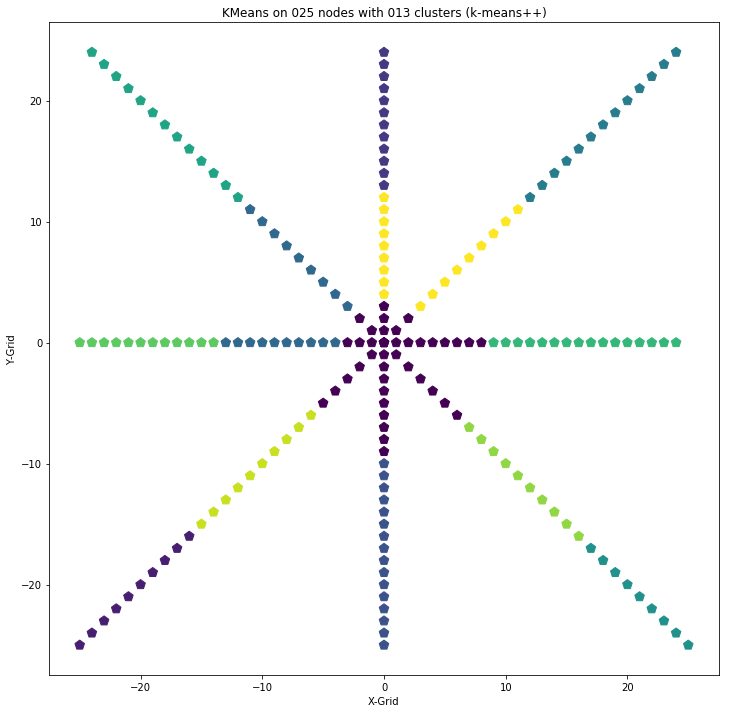

In [27]:
fig1=plt.figure(figsize=(12, 12))
titlename = 'KMeans on %03d nodes with %03d clusters (k-means++)' % (M,N)
plt.title(titlename)
plt.xlabel('X-Grid')
plt.ylabel('Y-Grid')
plt.scatter(x1, y1,marker='p',c=c1, s=100)
plt.show()

In [28]:
#for i in range(T.shape[0]):
#    print(T[i], p1[i])

In [29]:
x2, y2= zip(*T)
c2=p1[:]

In [30]:
c2.shape[0]

2500

In [31]:
g2=pd.DataFrame(c2)
g2.columns=['Cluster']
gc2=g2['Cluster'].value_counts()
gcs2=gc2.sum()

for i in range(gc2.shape[0]):
    print('Cluster %3d : %4d (%7.3f %%)' % (i+1,gc2[i],((gc2[i]/gcs2)*100)))
print('----------------------')
print('Cluster     : %4d' % (gcs2))

Cluster   1 :  142 (  5.680 %)
Cluster   2 :  173 (  6.920 %)
Cluster   3 :  209 (  8.360 %)
Cluster   4 :  227 (  9.080 %)
Cluster   5 :  166 (  6.640 %)
Cluster   6 :  226 (  9.040 %)
Cluster   7 :  149 (  5.960 %)
Cluster   8 :  240 (  9.600 %)
Cluster   9 :  234 (  9.360 %)
Cluster  10 :  204 (  8.160 %)
Cluster  11 :  187 (  7.480 %)
Cluster  12 :  186 (  7.440 %)
Cluster  13 :  157 (  6.280 %)
----------------------
Cluster     : 2500


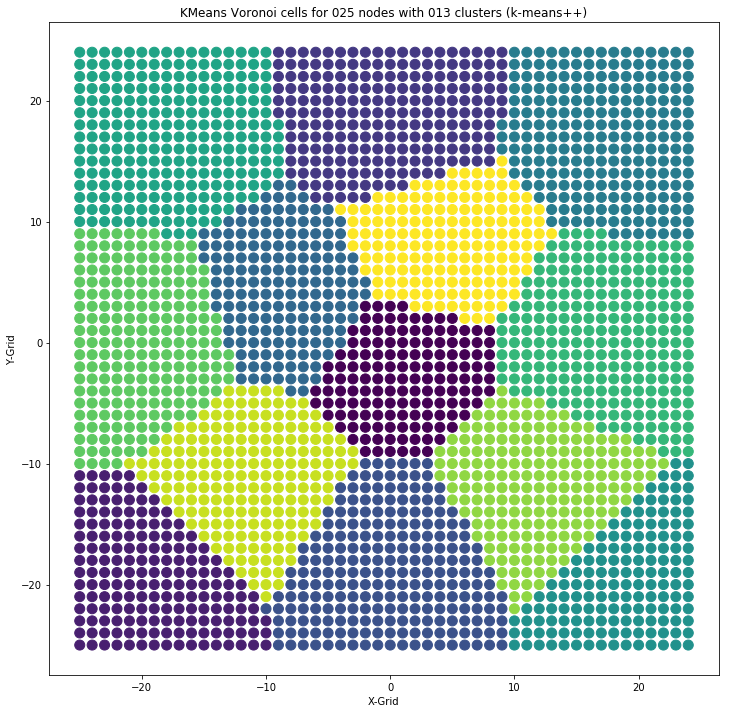

In [32]:
fig2=plt.figure(figsize=(12, 12))
titlename = 'KMeans Voronoi cells for %03d nodes with %03d clusters (k-means++)' % (M,N)
plt.title(titlename)
plt.xlabel('X-Grid')
plt.ylabel('Y-Grid')
plt.scatter(x2, y2,marker="o",c=c2, s=100)
plt.show()

## Plot Results - KMeans Two

In [33]:
#for i in range(X.shape[0]):
#    print(X[i], z2[i])

In [34]:
print(X.shape, z2.shape)

(200, 2) (200,)


In [35]:
x1, y1=zip(*X)
c1=z2[:]
#print(x1,y1,c1)

In [36]:
g3=pd.DataFrame(c1)
g3.columns=['Cluster']
gc3=g3['Cluster'].value_counts()
gcs3=gc3.sum()

for i in range(gc3.shape[0]):
    print('Cluster %3d : %4d (%7.3f %%)' % (i+1,gc3[i],((gc3[i]/gcs3)*100)))
print('----------------------')
print('Cluster     : %4d' % (gcs3))

Cluster   1 :   18 (  9.000 %)
Cluster   2 :   16 (  8.000 %)
Cluster   3 :   13 (  6.500 %)
Cluster   4 :   12 (  6.000 %)
Cluster   5 :   13 (  6.500 %)
Cluster   6 :   15 (  7.500 %)
Cluster   7 :   13 (  6.500 %)
Cluster   8 :   39 ( 19.500 %)
Cluster   9 :    9 (  4.500 %)
Cluster  10 :   13 (  6.500 %)
Cluster  11 :   10 (  5.000 %)
Cluster  12 :   13 (  6.500 %)
Cluster  13 :   16 (  8.000 %)
----------------------
Cluster     :  200


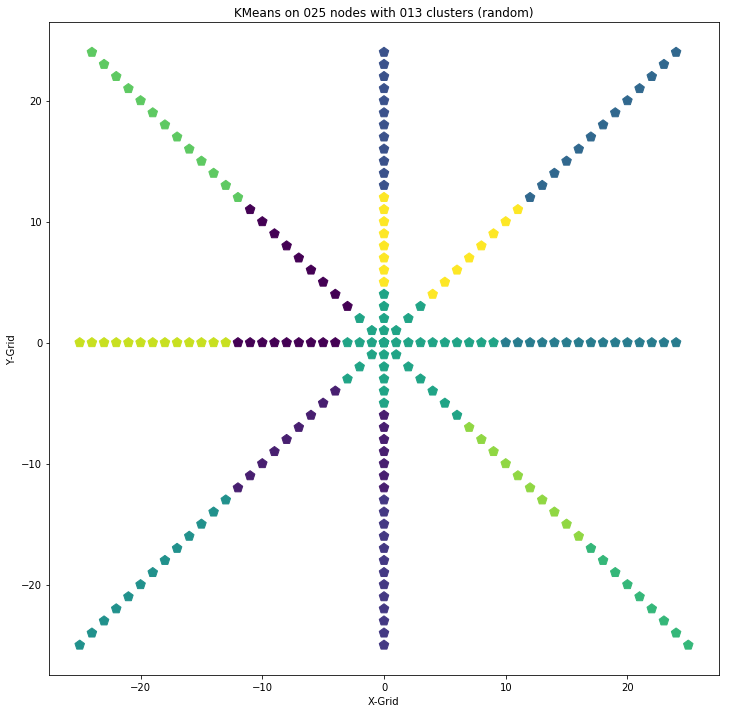

In [37]:
fig3=plt.figure(figsize=(12, 12))
titlename = 'KMeans on %03d nodes with %03d clusters (random)' % (M,N)
plt.title(titlename)
plt.xlabel('X-Grid')
plt.ylabel('Y-Grid')
plt.scatter(x1, y1,marker='p',c=c1, s=100)
plt.show()

In [38]:
#for i in range(T.shape[0]):
#    print(T[i], p2[i])

In [39]:
x2, y2= zip(*T)
c2=p2[:]

In [40]:
c2.shape[0]

2500

In [41]:
g4=pd.DataFrame(c2)
g4.columns=['Cluster']
gc4=g4['Cluster'].value_counts()
gcs4=gc4.sum()

for i in range(gc4.shape[0]):
    print('Cluster %3d : %4d (%7.3f %%)' % (i+1,gc4[i],((gc4[i]/gcs4)*100)))
print('----------------------')
print('Cluster     : %4d' % (gcs4))

Cluster   1 :  162 (  6.480 %)
Cluster   2 :  168 (  6.720 %)
Cluster   3 :  207 (  8.280 %)
Cluster   4 :  205 (  8.200 %)
Cluster   5 :  225 (  9.000 %)
Cluster   6 :  227 (  9.080 %)
Cluster   7 :  236 (  9.440 %)
Cluster   8 :  120 (  4.800 %)
Cluster   9 :  146 (  5.840 %)
Cluster  10 :  239 (  9.560 %)
Cluster  11 :  190 (  7.600 %)
Cluster  12 :  226 (  9.040 %)
Cluster  13 :  149 (  5.960 %)
----------------------
Cluster     : 2500


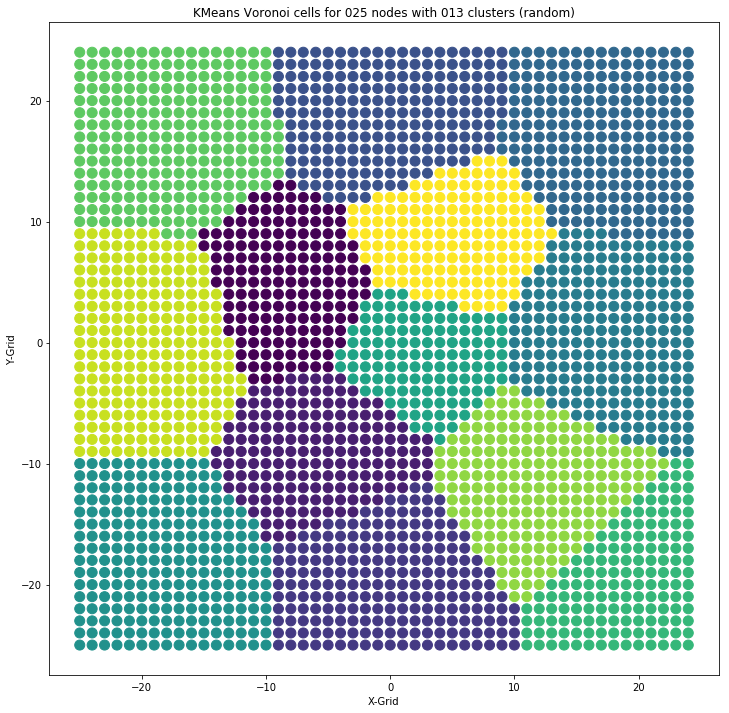

In [42]:
fig4=plt.figure(figsize=(12, 12))
titlename = 'KMeans Voronoi cells for %03d nodes with %03d clusters (random)' % (M,N)
plt.title(titlename)
plt.xlabel('X-Grid')
plt.ylabel('Y-Grid')
plt.scatter(x2, y2,marker="o",c=c2, s=100)
plt.show()

## Save Results - KMeans

In [43]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06'])
print(imagepath)

if not os.path.exists(imagepath):
    os.makedirs(imagepath)
    
figname='Chapter-006-Example-002-%03d-01.jpg' % (N)    
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06',figname])
fig1.savefig(imagename, bbox_inches='tight')

figname='Chapter-006-Example-002-%03d-02.jpg' % (N)
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06',figname])
fig2.savefig(imagename, bbox_inches='tight') 
    
figname='Chapter-006-Example-002-%03d-03.jpg' % (N)    
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06',figname])
fig3.savefig(imagename, bbox_inches='tight')

figname='Chapter-006-Example-002-%03d-04.jpg' % (N)
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06',figname])
fig4.savefig(imagename, bbox_inches='tight') 

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 06


## Done

In [44]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-19 11:30:55.156250
